# Importing The Data From Drive

In [2]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.3            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.2.1              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [3]:
!gdown --id 18ji974kPnH-RXh8OiYgujOZaxozCIxrt

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=18ji974kPnH-RXh8OiYgujOZaxozCIxrt
From (redirected): https://drive.google.com/uc?id=18ji974kPnH-RXh8OiYgujOZaxozCIxrt&confirm=t&uuid=289e8bf6-a817-47fc-8646-3a6dcc7e476d
To: /kaggle/working/copy-of-shai-level-2-training.zip
100%|█████████████████████████████████████████| 551M/551M [00:04<00:00, 123MB/s]


# Un-Zipping The Data

In [4]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/kaggle/working/copy-of-shai-level-2-training.zip"

# Directory to extract the contents of the zip file
extract_dir = "/kaggle/working/data"

# Create a directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted successfully.")

Dataset extracted successfully.


# Import Libraries 

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import f1_score
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50


# Preprocssing the Images

In [20]:
def preprocess_image(image):
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    return image

def apply_histogram_equalization(image):
    # Apply histogram equalization
    image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)


In [21]:
# Step 3: Load and Preprocess Images
data_dir = '/kaggle/working/data/train'
img_height, img_width = 224, 224
batch_size = 32

data = []
labels = []

for label, category in enumerate(['normal', 'virus', 'covid']):
    category_dir = os.path.join(data_dir, category)
    for img_name in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        #img = apply_histogram_equalization(img)
        #img = preprocess_image(img)
        data.append(img)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [22]:
data[1].shape

(224, 224, 3)

# Splitting The Data 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [24]:
# import os
# import shutil
# import random
# from pathlib import Path

# # Define paths
# data_dir = Path("/kaggle/working/data/train")
# train_dir = data_dir / "Train"
# test_dir = data_dir / "Test"
# val_dir = data_dir / "Val"

# # Define classes
# classes = ["virus", "normal", "covid"]

# # Define the ratio for splitting
# train_ratio = 0.8
# test_ratio = 0.1
# val_ratio = 0.1

# # Create train, test, and validation directories if they don't exist
# for directory in [train_dir, test_dir, val_dir]:
#     if not directory.exists():
#         directory.mkdir(parents=True)
#         for class_name in classes:
#             (directory / class_name).mkdir()

# # Function to split data
# def split_data(source, train, test, val, split_ratios):
#     files = os.listdir(source)
#     files = [file for file in files if not file.startswith(".")]  # Exclude hidden files
#     random.shuffle(files)
#     split_train = int(len(files) * split_ratios[0])
#     split_test = int(len(files) * split_ratios[1])

#     train_files = files[:split_train]
#     test_files = files[split_train:split_train + split_test]
#     val_files = files[split_train + split_test:]

#     for file in train_files:
#         shutil.copy(source / file, train / file)
#     for file in test_files:
#         shutil.copy(source / file, test / file)
#     for file in val_files:
#         shutil.copy(source / file, val / file)

# # Split data into train, test, and validation sets for each class
# for class_name in classes:
#     source_dir = data_dir / class_name
#     train_class_dir = train_dir / class_name
#     test_class_dir = test_dir / class_name
#     val_class_dir = val_dir / class_name
#     split_data(source_dir, train_class_dir, test_class_dir, val_class_dir, [train_ratio, test_ratio, val_ratio])

# print("Data splitting completed successfully.")


# Define Constants

In [25]:
# train_dir = 'data/train/Train'
# val_dir = 'data/train/Val'
# test_dir = 'data/train/Test'

# # Define image dimensions
img_height, img_width = 224, 224
batch_size = 32
EPOCHS = 20

# Setting the GPU

In [26]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.15.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# Data Augmentation 

In [27]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' 
)

val_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' )

train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=batch_size
)

validation_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=batch_size
)

test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=batch_size
)


# # Load and prepare training data
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load and prepare validation data
# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load and prepare test data
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# F1-Score Metric 

In [28]:
# Define a custom metric function for F1-score
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')
    return f1

# Building my Own Model 

In [29]:
# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for 3 classes and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,464,835 (150.55 MB)

 Trainable params: 39,464,835 (150.55 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=50
)

Epoch 1/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 12:56 29s/step - accuracy: 0.2812 - loss: 1.1075

W0000 00:00:1711620426.851721    5353 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/28 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3491 - loss: 1.3667   

W0000 00:00:1711620450.522950    5354 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.3572 - loss: 1.3115

W0000 00:00:1711620452.870305    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3579 - loss: 1.3063 - val_accuracy: 0.3125 - val_loss: 1.0732
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.3750 - loss: 1.0045 - val_accuracy: 0.5000 - val_loss: 0.9276
Epoch 3/50


W0000 00:00:1711620456.017525    5356 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.3599 - loss: 1.1151 - val_accuracy: 0.3187 - val_loss: 1.0298
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.2188 - loss: 1.2241 - val_accuracy: 0.0000e+00 - val_loss: 1.0381
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 372ms/step - accuracy: 0.3634 - loss: 1.0472 - val_accuracy: 0.4938 - val_loss: 0.9399
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.2500 - loss: 1.0654 - val_accuracy: 1.0000 - val_loss: 0.9967
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 377ms/step - accuracy: 0.5752 - loss: 0.9019 - val_accuracy: 0.6250 - val_loss: 0.7744
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6875 - loss: 0.7486 - val_accuracy: 0.5000 - val_loss: 0.8719
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 374ms/step - accuracy: 0.5830 - loss: 0.8200 - val_accuracy: 0.6687 - val_loss: 0.6598
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5938 - loss: 0.7237 - val_accuracy: 1.00

In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9508 - loss: 0.2097  
Test Loss: 0.22997966408729553
Test Accuracy: 0.949999988079071


W0000 00:00:1711620782.526503    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


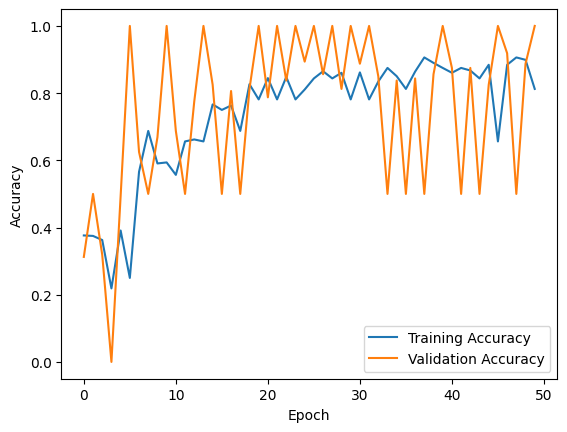

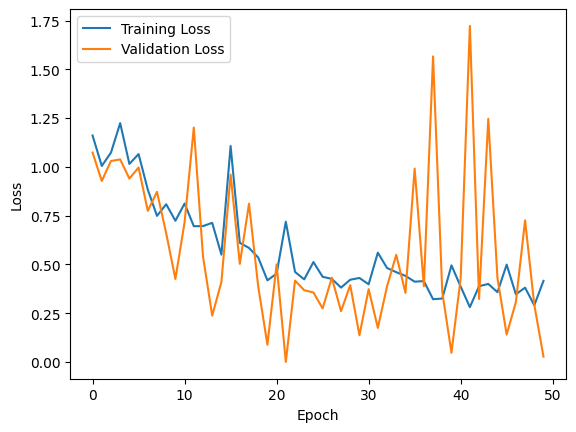

In [33]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Transfer Learning on Pretrained Model (VGG16)

In [34]:
# Step 6: Load Pre-trained Model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Step 7: Add Custom Layers on Top of Pre-trained Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Step 8: Freeze Base Model Layers for Transfer Learning
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile the Model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [35]:
history = vgg_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=50
)

Epoch 1/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 16:04 36s/step - accuracy: 0.3125 - loss: 1.0837

W0000 00:00:1711621058.756958    5353 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/28 ━━━━━━━━━━━━━━━━━━━━ 1:13 4s/step - accuracy: 0.4533 - loss: 1.0199

W0000 00:00:1711621079.752910    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5872 - loss: 0.8658

W0000 00:00:1711621087.616805    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5904 - loss: 0.8612 - val_accuracy: 0.7437 - val_loss: 0.6285
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.8438 - loss: 0.5532 - val_accuracy: 0.5000 - val_loss: 1.0902
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 374ms/step - accuracy: 0.8435 - loss: 0.4865 - val_accuracy: 0.8188 - val_loss: 0.5137
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7188 - loss: 0.5892 - val_accuracy: 1.0000 - val_loss: 0.3399
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 378ms/step - accuracy: 0.8371 - loss: 0.4407 - val_accuracy: 0.8438 - val_loss: 0.4062
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.2405 - val_accuracy: 1.0000 - val_loss: 0.4355
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 378ms/step - accuracy: 0.9017 - loss: 0.3190 - val_accuracy: 0.8438 - val_loss: 0.4438
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9375 - loss: 0.3007 - val_accuracy: 1.0000 - val_l

In [36]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 0.9485 - loss: 0.1549 
Test Loss: 0.18127310276031494
Test Accuracy: 0.9416666626930237


W0000 00:00:1711621441.214324    5353 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


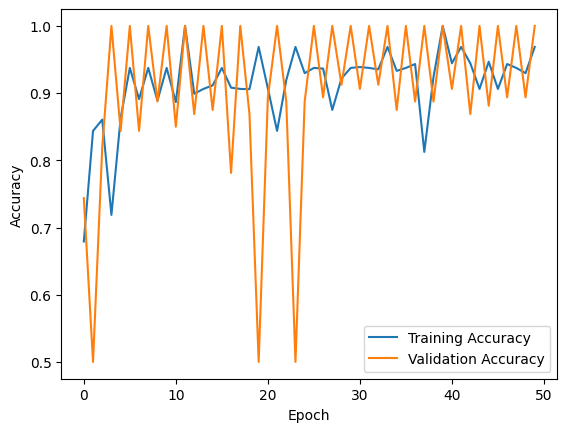

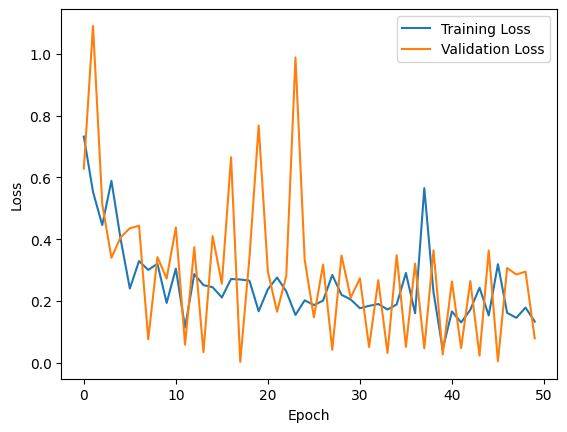

In [37]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Transfer Learning on Pre-trained Models (RESNET50)

In [38]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 7: Add Custom Layers on Top of Pre-trained Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Step 8: Freeze Base Model Layers for Transfer Learning
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Compile the Model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [39]:
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=50
)

Epoch 1/50
 2/28 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3438 - loss: 1.5973 

W0000 00:00:1711621455.719862    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 9/28 ━━━━━━━━━━━━━━━━━━━━ 11s 586ms/step - accuracy: 0.3550 - loss: 1.7255

W0000 00:00:1711621460.349214    5354 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3620 - loss: 1.5422

W0000 00:00:1711621469.701815    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.3622 - loss: 1.5364 - val_accuracy: 0.4688 - val_loss: 1.3369
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5312 - loss: 1.3440 - val_accuracy: 0.5000 - val_loss: 1.3810
Epoch 3/50


W0000 00:00:1711621472.729419    5353 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 366ms/step - accuracy: 0.3895 - loss: 1.0899 - val_accuracy: 0.3187 - val_loss: 1.1803
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4688 - loss: 0.9732 - val_accuracy: 0.0000e+00 - val_loss: 1.7292
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 366ms/step - accuracy: 0.4530 - loss: 0.9926 - val_accuracy: 0.6062 - val_loss: 0.9659
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.8282 - val_accuracy: 1.0000 - val_loss: 0.9016
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - accuracy: 0.5617 - loss: 0.9299 - val_accuracy: 0.4625 - val_loss: 0.9695
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 0.7906 - val_accuracy: 0.5000 - val_loss: 0.9157
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 371ms/step - accuracy: 0.5682 - loss: 0.8798 - val_accuracy: 0.4750 - val_loss: 0.9181
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 0.9401 - val_accuracy: 0.5000 - val

In [40]:
# Evaluate the model on test data
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 894ms/step - accuracy: 0.6390 - loss: 0.7085
Test Loss: 0.6411254405975342
Test Accuracy: 0.6833333373069763


W0000 00:00:1711621788.427175    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


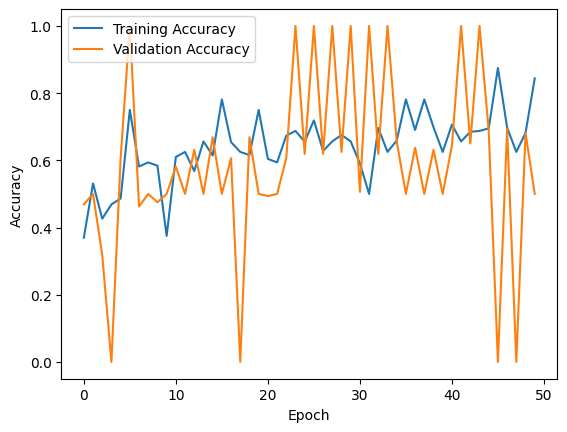

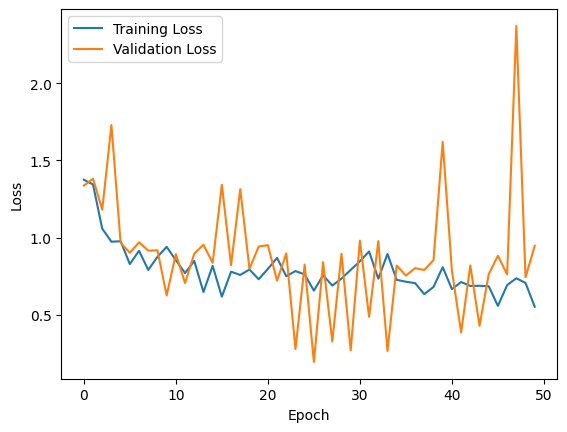

In [41]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing The Model

In [42]:
import os
import numpy as np
import cv2
import pandas as pd

def preprocess_image(img_path):
    # Load image
    img = cv2.imread(img_path)
    # Resize image
    img = cv2.resize(img, (img_height, img_width))
    # Apply histogram equalization
#     img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
#     img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
#     img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    # Normalize pixel values
    img = img / 255.0
    return img

# Load testing images and preprocess them
testing_images = []
testing_image_names = []

for img_name in os.listdir(testing_data_folder):
    img_path = os.path.join(testing_data_folder, img_name)
    testing_images.append(preprocess_image(img_path))
    testing_image_names.append(img_name)

# Convert the list of images to a numpy array
testing_images = np.array(testing_images)

# Predict labels for testing images
predicted_labels = vgg_model.predict(testing_images)

# Get the predicted class labels
predicted_classes = [np.argmax(label) for label in predicted_labels]

# Map class indices to class names
class_names = {0: 'normal', 1: 'virus', 2: 'covid'}
predicted_labels = [class_names[label] for label in predicted_classes]

# Create a pandas DataFrame to store image names and predicted labels
df_results = pd.DataFrame({'Image': testing_image_names, 'Label': predicted_labels})

# Display the DataFrame
print(df_results)

 2/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step 

W0000 00:00:1711622727.480173    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step
              Image   Label
0     337385832.jpg   covid
1    643791781.jpeg  normal
2      6963610.jpeg  normal
3    491589162.jpeg   virus
4     20328626.jpeg  normal
..              ...     ...
508  358657359.jpeg   virus
509   29162480.jpeg  normal
510   175254813.jpg   covid
511  259719616.jpeg  normal
512  421339146.jpeg   virus

[513 rows x 2 columns]


In [ ]:
# import os
# import pandas as pd
# from PIL import Image

# # Define the path to the testing data folder
# testing_data_folder = '/kaggle/working/data/test'

# # Function to preprocess images
# def preprocess_image(img_path):
#     img = Image.open(img_path)
#     img = img.resize((img_height, img_width))
#     img = img.convert('RGB')
#     img = tf.keras.preprocessing.image.img_to_array(img)
#     img = img / 255.0  # Normalize pixel values
#     return img

# # Load testing images and preprocess them
# testing_images = []
# testing_image_names = []
# for img_name in os.listdir(testing_data_folder):
#     img_path = os.path.join(testing_data_folder, img_name)
#     testing_images.append(preprocess_image(img_path))
#     testing_image_names.append(img_name)

# # Convert the list of images to a numpy array
# testing_images = np.array(testing_images)

# # Predict labels for testing images
# predicted_labels = model.predict(testing_images)

# # Get the predicted class labels
# predicted_classes = [np.argmax(label) for label in predicted_labels]

# # Map class indices to class names
# class_names = {0: 'normal', 1: 'virus', 2: 'covid'}
# predicted_labels = [class_names[label] for label in predicted_classes]

# # Create a pandas DataFrame to store image names and predicted labels
# df_results = pd.DataFrame({'Image': testing_image_names, 'Label': predicted_labels})

# # Display the DataFrame
# print(df_results)

In [43]:
df_results.to_csv('/kaggle/working/Submit-3.csv')